A third-party travel insurance servicing company that is based in Singapore.

The attributes:

- Target: Claim Status (Claim.Status)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- Commission received for travel insurance agency (Commission)
- Gender of insured (Gender)
- Age of insured (Age)

In [123]:
import pandas as pd
df = pd.read_csv('travel insurance.csv')

In [124]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [125]:
print(df.isnull().any())

Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                   True
Age                     False
dtype: bool


In [126]:
df['Gender'].isnull().sum()

45107

In [127]:
df.shape

(63326, 11)

In [128]:
df_clean = df.dropna()

In [129]:
df_clean.isnull().any()

Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                  False
Age                     False
dtype: bool

In [130]:
df_clean.shape

(18219, 11)

In [131]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


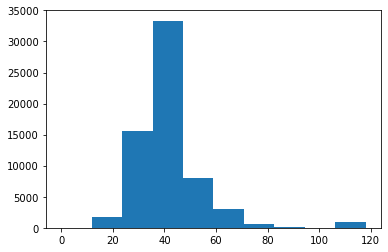

In [132]:
import matplotlib.pyplot as plt
plt.hist(df.Age)
plt.show()

In [133]:
df_clean1 = df_clean[df_clean.Age != 118]

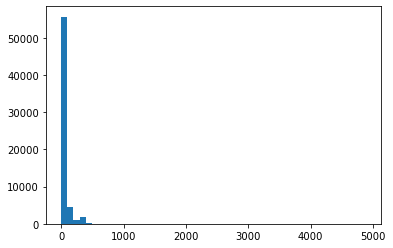

In [134]:
plt.hist(df.Duration,bins= 50)
plt.show()

In [135]:
df = df_clean1[df_clean1.Duration != 0]

In [136]:
df['Duration'].any() == 0

False

# Checking the Claim feature

In [137]:
df['Claim'].value_counts()

No     16727
Yes      633
Name: Claim, dtype: int64

In [138]:
df.groupby(['Gender'])['Claim'].value_counts(normalize=True)

Gender  Claim
F       No       0.960107
        Yes      0.039893
M       No       0.966883
        Yes      0.033117
Name: Claim, dtype: float64

In [139]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [140]:
df = pd.get_dummies(data = df, columns = ['Gender','Distribution Channel'],drop_first = True)

In [141]:
df.head()

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Gender_M,Distribution Channel_Online
0,CBH,Travel Agency,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81,0,0
1,CBH,Travel Agency,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71,0,0
5,JZI,Airlines,Value Plan,No,66,UNITED STATES,-121.0,42.35,44,0,1
11,JZI,Airlines,Basic Plan,No,1,MALAYSIA,-18.0,6.30,47,1,1
12,KML,Travel Agency,Premier Plan,No,53,NORWAY,-130.0,49.40,48,0,1


In [142]:
X = df[['Duration', 'Net Sales', 'Age', 'Gender_M','Distribution Channel_Online']]

In [143]:
X = X.rename(columns={'Gender_M':'Gender','Distribution Channel_Online':'Distribution Channel'})
X.head()

,Duration,Net Sales,Age,Gender,Distribution Channel
0,186,-29.0,81,0,0
1,186,-29.0,71,0,0
5,66,-121.0,44,0,1
11,1,-18.0,47,1,1
12,53,-130.0,48,0,1


In [144]:
y = df['Claim']
y = df['Claim'].replace(to_replace=['Yes','No'], value=[0,1]).values

In [145]:
y[:3]

array([1, 1, 1], dtype=int64)

In [146]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [147]:
# now use train/split to split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [148]:
print(X_trainset.shape)
print(X_testset.shape)

(12152, 5)
(5208, 5)


In [149]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01).fit(X_trainset,y_trainset)
LR.score(X_train, y_train)

0.9640388413429888

In [150]:
LR = LogisticRegression().fit(X_trainset,y_trainset)
LR.score(X_train, y_train)

0.9640388413429888

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

cross_val_score(LogisticRegression(),X_train, y_train, cv=5)

array([0.9638009 , 0.9638009 , 0.96419753, 0.96419753, 0.96419753])

In [160]:
predictions = LR.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.96      1.00      0.98      5012

    accuracy                           0.96      5208
   macro avg       0.48      0.50      0.49      5208
weighted avg       0.93      0.96      0.94      5208



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# OVERSAMPLING USING SMOTE

In [162]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [164]:
print(y_train.shape,y_train_res.shape)

(12152,) (23430,)


In [168]:
cross_val_score(LogisticRegression(),X_train_res, y_train_res, cv=5)

array([0.65066155, 0.63999146, 0.6453265 , 0.64724712, 0.64703372])

In [170]:
LR = LogisticRegression().fit(X_train_res,y_train_res)
predictions = LR.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.08      0.56      0.14       196
           1       0.98      0.75      0.85      5012

    accuracy                           0.74      5208
   macro avg       0.53      0.65      0.49      5208
weighted avg       0.94      0.74      0.82      5208



In [171]:
cross_val_score(LogisticRegression(C=.01),X_train_res, y_train_res, cv=5)

array([0.65172855, 0.63807085, 0.64297909, 0.64831413, 0.64639351])

In [174]:
cross_val_score(LogisticRegression(C=10),X_train_res, y_train_res, cv=5)

array([0.65066155, 0.64020487, 0.6453265 , 0.64703372, 0.64724712])

# Using GridSearchCV for finding the best Parameters

In [177]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(), {
    'C': [0.001,0.01,0.1,1,10,100],
}, cv=5, return_train_score=False)
clf.fit(X_train_res, y_train_res)
clf.cv_results_

{'mean_fit_time': array([0.03220181, 0.02820163, 0.02140121, 0.02520151, 0.02660146,
        0.0228013 ]),
 'std_fit_time': array([0.00870454, 0.01643758, 0.00119998, 0.00271302, 0.00101989,
        0.00231517]),
 'mean_score_time': array([0.0012001 , 0.00100007, 0.00080004, 0.00079999, 0.0006    ,
        0.00080013]),
 'std_score_time': array([0.00039999, 0.00063249, 0.00040002, 0.00039999, 0.0004899 ,
        0.00040007]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.64169868, 0.65172855, 0.65044814, 0.65066155, 0.65066155,
        0.65066155]),
 'split1_test_score': array([0.62974819, 0.63807085, 0.63999146, 0.63999146, 0.64020487,
        0.64020487]),
 'split2_test_score': array([0.63508323, 0.64297909, 0.6451131 , 0.6453265 ,

In [178]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032202,0.008705,0.0012,0.000400,0.001,{'C': 0.001},0.641699,0.629748,0.635083,0.637644,0.634656,0.635766,0.003915,6
1,0.028202,0.016438,0.0010,0.000632,0.01,{'C': 0.01},0.651729,0.638071,0.642979,0.648314,0.646394,0.645497,0.004670,5
2,0.021401,0.001200,0.0008,0.000400,0.1,{'C': 0.1},0.650448,0.639991,0.645113,0.648101,0.646607,0.646052,0.003506,3
3,0.025202,0.002713,0.0008,0.000400,1,{'C': 1},0.650662,0.639991,0.645327,0.647247,0.647034,0.646052,0.003490,3
4,0.026601,0.001020,0.0006,0.000490,10,{'C': 10},0.650662,0.640205,0.645327,0.647034,0.647247,0.646095,0.003416,1
5,0.022801,0.002315,0.0008,0.000400,100,{'C': 100},0.650662,0.640205,0.645327,0.647034,0.647247,0.646095,0.003416,1


In [181]:
df[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.635766
1,0.01,0.645497
2,0.1,0.646052
3,1,0.646052
4,10,0.646095
5,100,0.646095


In [182]:
clf.best_params_

{'C': 10}

In [183]:
clf.best_score_

0.6460947503201024

In [186]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(LogisticRegression(), {
    'C': [0.001,0.01,0.1,1,10,100],
}, cv=5, return_train_score=False)

clf.fit(X_train_res, y_train_res)
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


,param_C,mean_test_score
0,0.001,0.635766
1,0.01,0.645497
2,0.1,0.646052
3,1,0.646052
4,10,0.646095
5,100,0.646095


In [189]:
from sklearn import svm
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [191]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_res,y_train_res)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.691592,"{'C': 20, 'kernel': 'rbf'}"
1,logistic_regression,0.646137,{'C': 5}
